<a href="https://www.kaggle.com/code/warrenkuo/banana-quality-v2-test-accuracy-0-985?scriptVersionId=166408045" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bananas are nutritious
Each banana is about 120 grams, and its nutrients include:
* Calories: about 100 calories
* Protein: 1.8 grams
* Carbohydrates: 24 grams

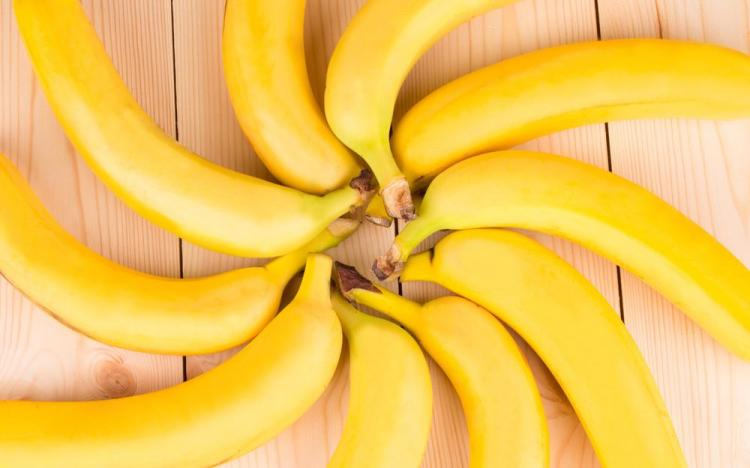

# 9 Amazing Benefits of Bananas: A must-eat treasure fruit for weight loss
1. Medium to low GI (Glycemic index) value stabilizes blood sugar concentration
2. High fiber helps digestion
3. Helps with weight loss and suppresses appetite
4. Reduce the chance of asthma in children
5. Bananas are high in potassium and good for heart health
6. Rich in antioxidants
7. Helps memory and maintains a good mood
8. Eating before and after exercise is convenient and nutritious
9. Black-spotted banana helps digestion and relieves constipation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banana/banana_quality.csv


In [2]:
df = pd.read_csv('/kaggle/input/banana/banana_quality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [3]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


# Correlation between Features & Qualities

In [4]:
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})
correlation = df.corr()['Quality'].abs().sort_values(ascending = False)

print(correlation)

Quality        1.000000
Weight         0.388789
Sweetness      0.377220
HarvestTime    0.376600
Size           0.352983
Ripeness       0.350503
Softness       0.001637
Acidity        0.000860
Name: Quality, dtype: float64


# Feature Importance Ranking

In [5]:
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

x = df.drop(columns=['Quality'])
y = df['Quality']
model = RandomForestClassifier()
model.fit(x, y)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print(feature_importance_df)

       Feature  Importance
1       Weight    0.170048
2    Sweetness    0.159807
0         Size    0.152763
3     Softness    0.149591
4  HarvestTime    0.143028
5     Ripeness    0.138154
6      Acidity    0.086609


# SVC

In [6]:
x = df.drop(columns = ['Quality'])
y = df['Quality']
model = SVC()
scores = cross_val_score(model, x, y, cv = 5)

print('Cross-validation scores:', scores)
print('Average score:', scores.mean())

Cross-validation scores: [0.97875  0.981875 0.97     0.983125 0.97625 ]
Average score: 0.9780000000000001


# XGBoost

In [7]:
x = df.drop(columns = ['Quality'])
y = df['Quality']
model = XGBClassifier()
scores = cross_val_score(model, x, y, cv = 5)

print('Cross-validation scores:', scores)
print('Average score:', scores.mean())

Cross-validation scores: [0.969375 0.965    0.96375  0.975625 0.97    ]
Average score: 0.96875


# RandomForest

In [8]:
x = df.drop(columns = ['Quality'])
y = df['Quality']
model = RandomForestClassifier()
scores = cross_val_score(model, x, y, cv = 5)

print('Cross-validation scores:', scores)
print('Average score:', scores.mean())

Cross-validation scores: [0.959375 0.96     0.96125  0.975625 0.956875]
Average score: 0.9626250000000001


# Training & Test
* The results are very close, look at the training and test sets.

In [9]:
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df.drop(columns = ['Quality'])
y = df['Quality']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print('SVC Accuracy:', svc_accuracy)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print('XGBoost Accuracy:', xgb_accuracy)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', rf_accuracy)

SVC Accuracy: 0.98125
XGBoost Accuracy: 0.97875
Random Forest Accuracy: 0.975


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
svc = SVC(max_iter = 250, kernel = 'rbf', random_state = 6)
svc.fit(X_scaled, y)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=250, random_state=6)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'max_iter': [100, 200, 300, 400, 500]}

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'max_iter': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [12]:
param_scores = grid_search.cv_results_['mean_test_score']
param_results = {}
for params, score in zip(grid_search.cv_results_['params'], param_scores):
    param_results[str(params)] = score

print('Best Parameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 500}
Best Accuracy: 0.9815625000000001
Test Accuracy: 0.985


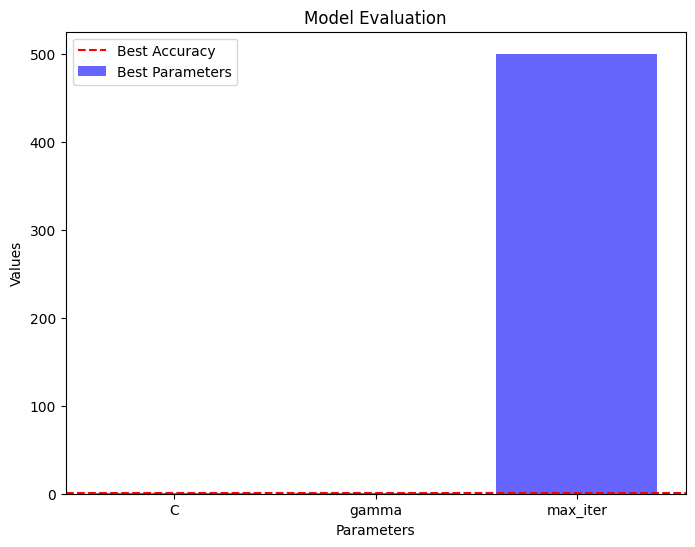

In [13]:
import matplotlib.pyplot as plt

best_params = {'C': 1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 500}
best_accuracy = 0.9815625000000001

param_values = [float(value) if isinstance(value, (int, float)) else None for value in best_params.values()]
plt.figure(figsize = (8, 6))
plt.bar([key for key, value in best_params.items() if isinstance(value, (int, float))], 
        [value for value in param_values if value is not None], 
        color = 'blue', alpha = 0.6, label = 'Best Parameters')

plt.axhline(y = best_accuracy, color = 'red', linestyle = '--', label = 'Best Accuracy')
plt.title('Model Evaluation')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-

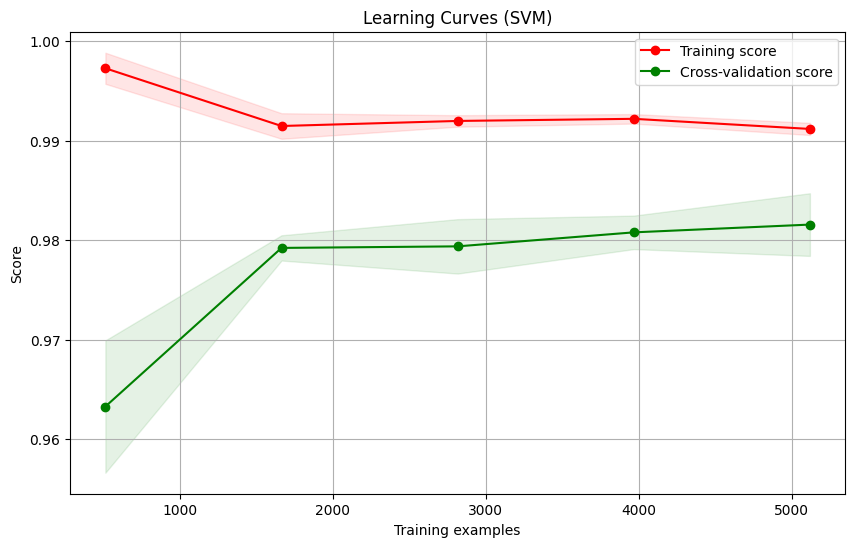

In [14]:
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv = None, n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure(figsize = (10, 6))
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)

    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1,
                     color= 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r',
             label = 'Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g',
             label = 'Cross-validation score')

    plt.legend(loc = 'best')
    return plt
estimator = grid_search.best_estimator_
title = 'Learning Curves (SVM)'
plot_learning_curve(estimator, title, X_train, y_train, cv = 5, n_jobs = -1)
plt.show()

* It can be seen that SVC has the best effect. The results of these three methods are very close. In my tests, changing the value of CV and test_ size or random_state ran still didn't change the results.

* By the way, if it’s me, I like bananas with black spots on the skin at the beginning, because they are the most nutritious~

* Which kind of banana do you like ?

# Hello Everyone ~

# I sincerely hope you can give me suggestions and comments on my notebook.

# THX !!